In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [14]:
df = pd.read_csv("loan_data.csv")

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [16]:
df = df.drop(['Loan_ID'], axis=1)

In [17]:
# The numbers of rows and columns in the dataset.
df.shape

(381, 12)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         373 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      360 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


# Handling the missing values in the dataset

In [19]:
df.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
# Fill missing values with mode for categorical columns
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().iloc[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode().iloc[0]).astype(int)
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0]).astype(int)

# Replace and convert 'Dependents' column values
df['Dependents'] = df['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3})
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode().iloc[0])

# Convert 'CoapplicantIncome' and 'LoanAmount' to integers
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)
df['LoanAmount'] = df['LoanAmount'].astype(int)


In [22]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Converting categorical data into numerical form

In [23]:
def cat_to_num(df, c_var):
    for i in c_var:
        uniques_value = df[i].unique()
        df[i].replace(uniques_value, [0, 1], inplace=True)

    for i in ['Property_Area']:
        uniques_value = df[i].unique()
        df[i].replace(uniques_value, [0, 1, 3], inplace=True)

In [24]:
c_variables = ['Gender', 'Married', 'Education', 'Education','Self_Employed', 'Loan_Status']

cat_to_num(df, c_variables)

/tmp/ipykernel_776/551358396.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].replace(uniques_value, [0, 1], inplace=True)
/tmp/ipykernel_776/551358396.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i].replace(uniques_value, [0, 1], inplace=True)
/tmp/ipykernel_776/551358396.py:8: F

In [39]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1.0,0,0,4583,1508,128,360,1,0,0
1,0,0,0.0,0,1,3000,0,66,360,1,1,1
2,0,0,0.0,1,0,2583,2358,120,360,1,1,1
3,0,1,0.0,0,0,6000,0,141,360,1,1,1
4,0,0,0.0,1,0,2333,1516,95,360,1,1,1


# Data Visualization

#### Analyze categorical values assigned to columns

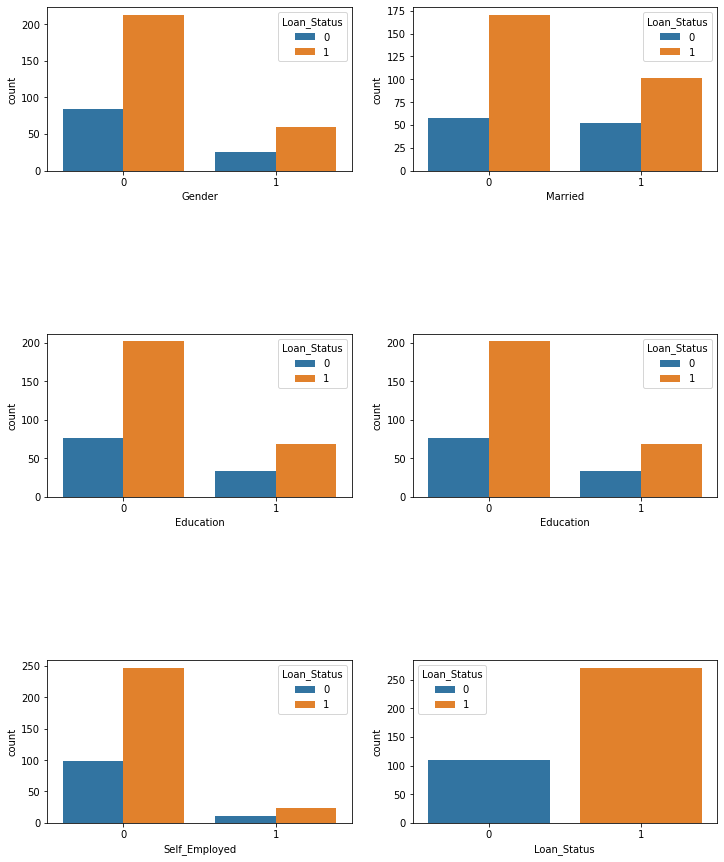

In [26]:
fig, ax = plt.subplots(3, 2, figsize=(12,15))

for index, cat_col in enumerate(c_variables):
    row, col = index//2, index%2
    sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=ax[row, col])

plt.subplots_adjust(hspace=1)

#### Analyze Numerical Columns

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       381.000000         381.000000  381.000000
mean       3579.845144        1277.272966  104.986877
std        1419.813818        2340.818546   28.358464
min         150.000000           0.000000    9.000000
25%        2600.000000           0.000000   90.000000
50%        3333.000000         983.000000  110.000000
75%        4288.000000        2016.000000  127.000000
max        9703.000000       33837.000000  150.000000


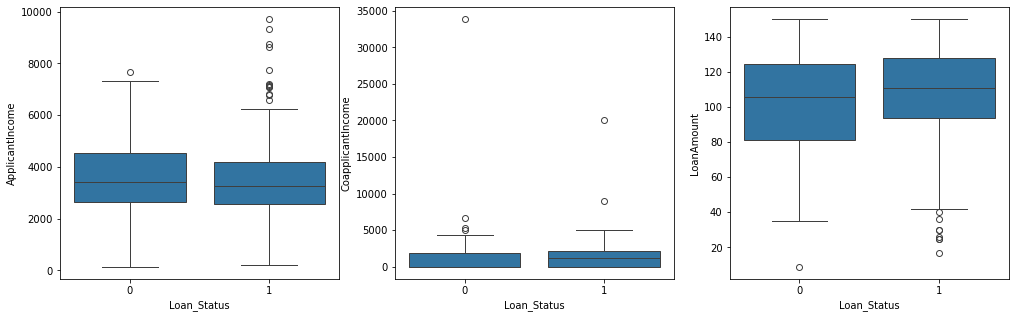

In [27]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

# Preprocessing Data

In [28]:
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

In [29]:
X.shape, y.shape

((381, 11), (381,))

### Splitting dataset into train and test

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((304, 11), (304,), (77, 11), (77,))

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Model - DecisionTreeClassifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score

In [34]:
model = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)

In [35]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)

# Testing Part

In [36]:
y_pred = model.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)
roc_score = roc_auc_score(y_test, y_pred)

print(f'Accuracy Score: {accuracy*100:0.2f}%')
print(f'Roc Score: {roc_score*100:0.2f}%')

Accuracy Score: 81.82%
Roc Score: 66.67%


In [38]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,7,14,21
1,0,56,56
All,7,70,77


In [41]:
import pickle

# Save the trained XGBoost model to a file
with open('loan.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully.")

Model saved successfully.


In [44]:
X_test[1:2]

array([[-0.57235147, -0.8660254 ,  0.3048003 , -0.61237244, -0.3863337 ,
        -1.20157723,  0.07757063, -0.29003686,  0.3221407 ,  0.31622777,
        -0.4316507 ]])